# Visualize the QuadTree

## 2 points at most per bounding box, with Gaussian distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


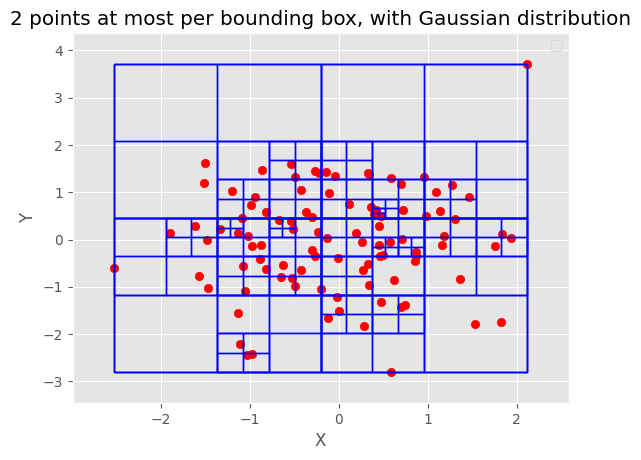

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.style.use('ggplot')


def draw_quad_tree(points_df, rectangles_df, graph_name):
    points_x = points_df['pointX']
    points_y = points_df['pointY']

    rect_center_x = rectangles_df['rectCenterX']
    rect_center_y = rectangles_df['rectCenterY']
    rect_width = rectangles_df['rectWidth']
    rect_height = rectangles_df['rectHeight']

    # Plotting
    fig, ax = plt.subplots()

    # Plot points
    ax.scatter(points_x, points_y, color='red')

    # Plot rectangles
    for i in range(len(rectangles_df)):
        rect = patches.Rectangle(
            (rect_center_x[i] - rect_width[i] / 2,
             rect_center_y[i] - rect_height[i] / 2),
            rect_width[i],
            rect_height[i],
            linewidth=1,
            edgecolor='blue',
            facecolor='none',
        )
        ax.add_patch(rect)

   # Set plot limits
    ax.set_xlim(
        points_x.min() - (points_x.max() - points_x.min())/10,
        points_x.max() + (points_x.max() - points_x.min())/10
    )
    ax.set_ylim(
        points_y.min() - (points_y.max() - points_y.min())/10,
        points_y.max() + (points_y.max() - points_y.min())/10
    )


    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(graph_name)

    # Add legend
    ax.legend()

    # Show the plot
    plt.show()


# Read points data from CSV
points_df = pd.read_csv('QuadTreeGaussianPoints.csv')

# Read rectangles data from CSV
rectangles_df = pd.read_csv('QuadTreeGaussianRects.csv')

draw_quad_tree(points_df, rectangles_df,
               "2 points at most per bounding box, with Gaussian distribution")


## 2 points at most per bounding box, with Uniform distribution

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


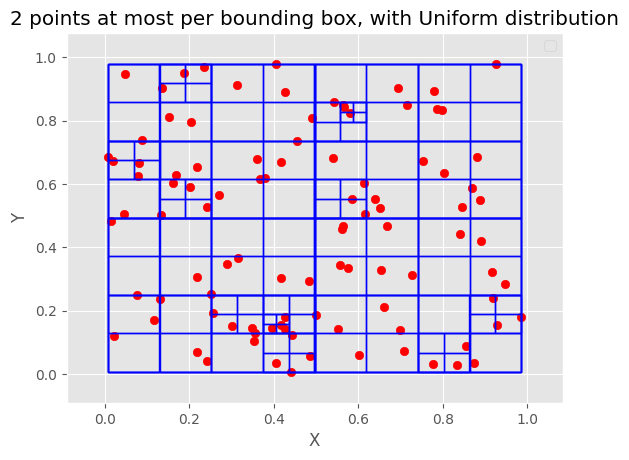

In [58]:
# Read points data from CSV
points_df = pd.read_csv('QuadTreeUniformPoints.csv')

# Read rectangles data from CSV
rectangles_df = pd.read_csv('QuadTreeUniformRects.csv')

draw_quad_tree(points_df, rectangles_df,
               "2 points at most per bounding box, with Uniform distribution")


# Visualize 2D KD Tree

## 2D KD Tree, with Gaussian distribution

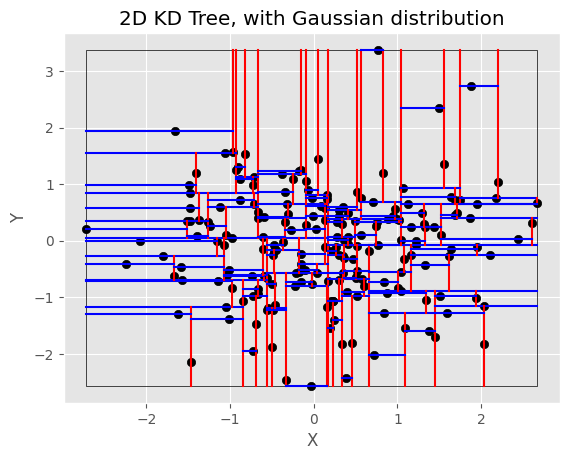

In [59]:
import matplotlib.pyplot as plt
import pandas as pd


def plot_2d_kd_tree(csv_file, graph_title):
    # Load the data from the CSV file
    data = pd.read_csv(csv_file)
    points = data[['pointX', 'pointY']].values

    min_x = min(points[:, 0])
    max_x = max(points[:, 0])
    min_y = min(points[:, 1])
    max_y = max(points[:, 1])

    # Calculate the dimensions of the black rectangle
    rect_width = max_x - min_x
    rect_height = max_y - min_y

    plt.title(graph_title)

    # Create a scatter plot of the points in black
    plt.scatter(points[:, 0], points[:, 1], color='black')

    # Plot the split lines
    for i in range(len(data)):
        lineStartX = data['lineStartX'][i]
        lineStartY = data['lineStartY'][i]
        lineEndX = data['lineEndX'][i]
        lineEndY = data['lineEndY'][i]
        splitDim = data['splitDim'][i]

        # Set the color based on splitDim
        if splitDim == 0:
            color = 'red'
        else:
            color = 'blue'

        plt.plot([lineStartX, lineEndX], [lineStartY, lineEndY],
                 color=color)

    # Draw a black rectangle around the points
    rect = plt.Rectangle((min_x, min_y), rect_width, rect_height,
                         edgecolor='black', facecolor='none')
    plt.gca().add_patch(rect)

    # Set axis labels and legend
    plt.xlabel('X')
    plt.ylabel('Y')

    # Show the plot
    plt.show()


plot_2d_kd_tree('2DKDTreeGaussian.csv',
                '2D KD Tree, with Gaussian distribution')


## 2D KD Tree, with Uniform distribution

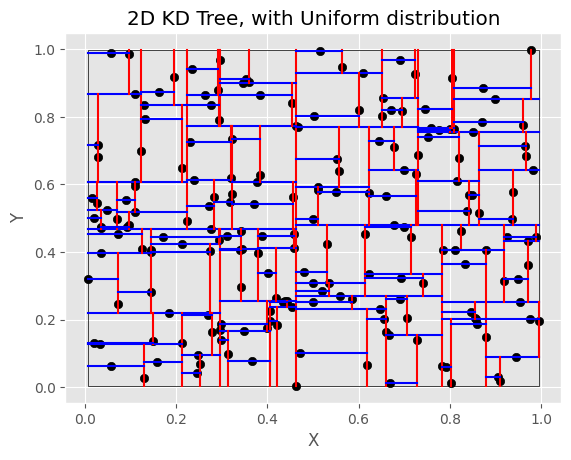

In [60]:
plot_2d_kd_tree('2DKDTreeUniform.csv',
                '2D KD Tree, with Uniform distribution')
